<a href="https://colab.research.google.com/github/mipypf/scej-mi/blob/develop/example_brics_smarts.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install rdkit==2024.3.5

In [17]:
import pandas as pd
import numpy as np
import random

from rdkit import Chem
from rdkit.Chem import AllChem, Draw, Descriptors, Recap, BRICS, rdChemReactions
from rdkit import RDLogger

import warnings

warnings.filterwarnings("ignore")
RDLogger.DisableLog('rdApp.*')
random.seed(42)

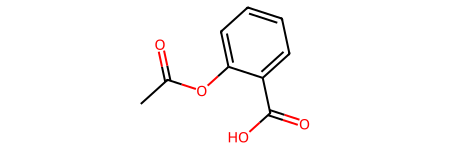

In [18]:
smiles = "CC(=O)Oc1ccccc1C(=O)O"  # アセチルサリチル酸
mol = Chem.MolFromSmiles(smiles)
mol

In [19]:
recap_tree = Recap.RecapDecompose(mol)
recap_tree

In [20]:
fragments_recap = list(recap_tree.GetLeaves().keys())
fragments_recap

['*C(C)=O', '*O', '*Oc1ccccc1C(*)=O', '*C(=O)c1ccccc1*']

In [21]:
fragment_mols_recap = [Chem.MolFromSmiles(f) for f in list(fragments_recap)]
fragment_mols_recap

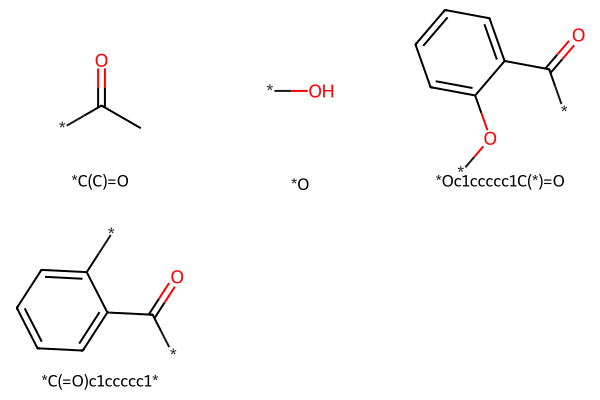

In [22]:
Draw.MolsToGridImage(fragment_mols_recap, molsPerRow=3, subImgSize=(200,200), legends=fragments_recap)

In [23]:
fragments_brics = BRICS.BRICSDecompose(mol)
fragments_brics

{'[1*]C(C)=O', '[16*]c1ccccc1[16*]', '[3*]O[3*]', '[6*]C(=O)O'}

In [24]:
fragment_mols_brics = [Chem.MolFromSmiles(f) for f in fragments_brics]
fragment_mols_brics

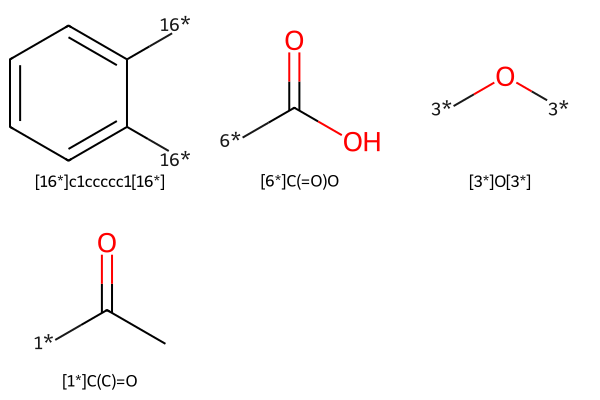

In [25]:
Draw.MolsToGridImage(fragment_mols_brics, molsPerRow=3, subImgSize=(200,200), legends=fragments_brics)

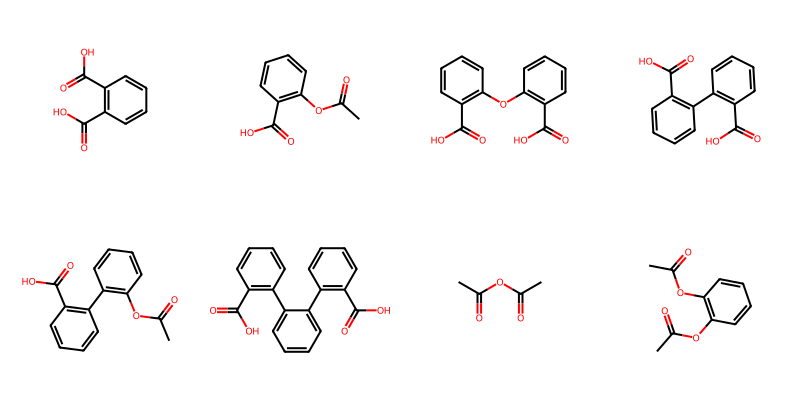

In [26]:
generated_mols_brics_1 = BRICS.BRICSBuild(fragment_mols_brics)

generated_mol_brics_list_1 = [m for m in generated_mols_brics_1]

Draw.MolsToGridImage(generated_mol_brics_list_1, molsPerRow=4, subImgSize=(200,200))

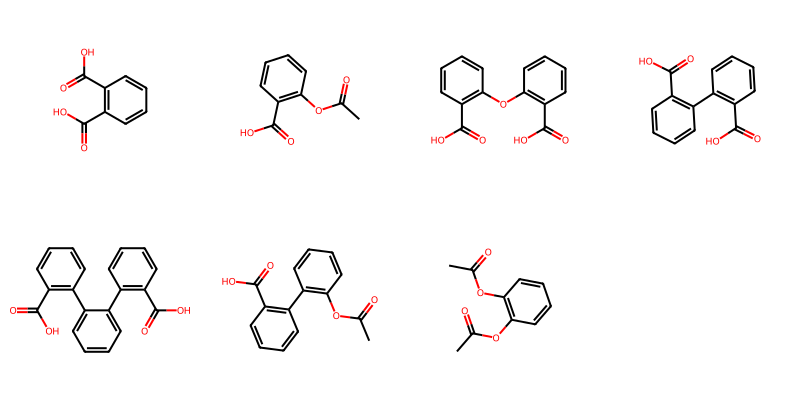

In [27]:
generated_mols_brics_2 = BRICS.BRICSBuild(fragment_mols_brics, seeds=[Chem.MolFromSmiles('[16*]c1ccccc1[16*]')])

generated_mol_brics_list_2 = [m for m in generated_mols_brics_2]

Draw.MolsToGridImage(generated_mol_brics_list_2, molsPerRow=4, subImgSize=(200,200))

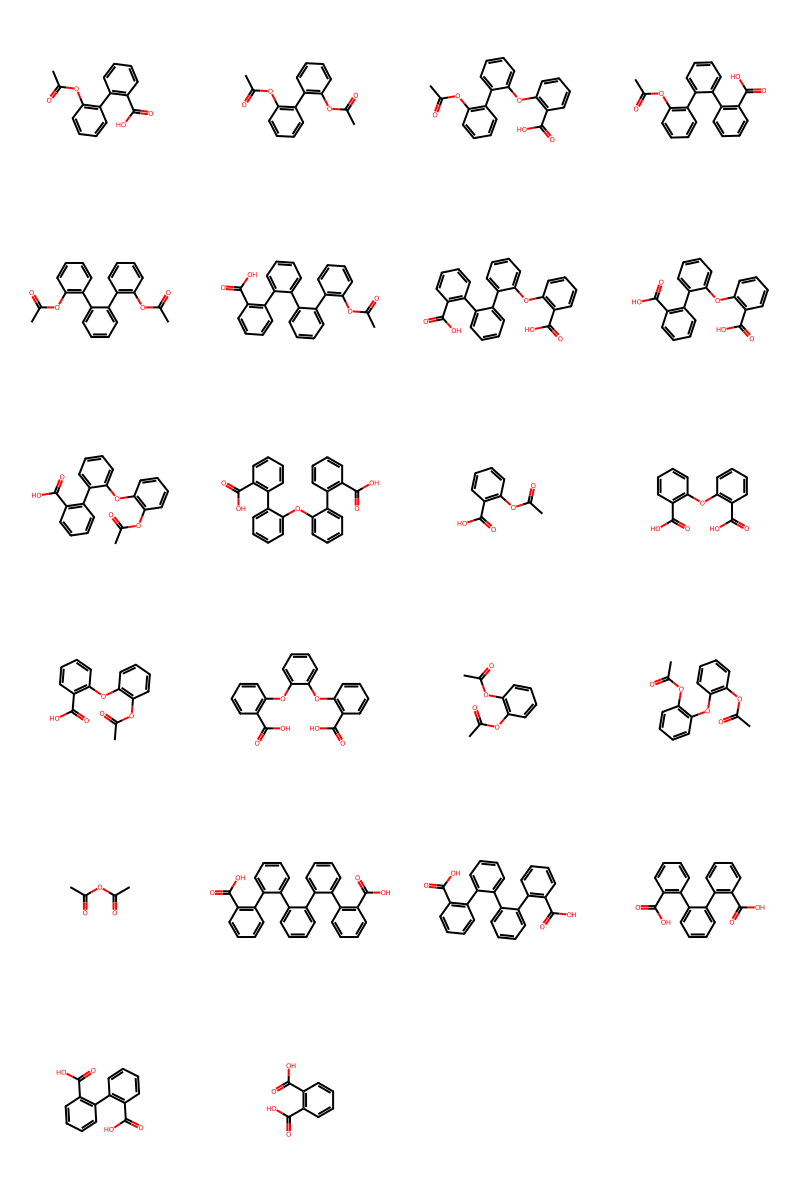

In [28]:
generated_mols_brics_3 = BRICS.BRICSBuild(fragment_mols_brics, maxDepth=5)

generated_mol_brics_list_3 = [m for m in generated_mols_brics_3]

Draw.MolsToGridImage(generated_mol_brics_list_3, molsPerRow=4, subImgSize=(200,200))

In [29]:
smarts = Chem.MolToSmarts(mol)
smarts

'[#6]-[#6](=[#8])-[#8]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1-[#6](=[#8])-[#8]'

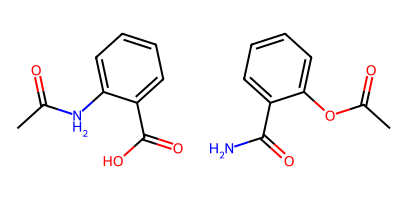

In [32]:
# C:1	→Cは反応前後で変化しないため同じ番号に固定
# O:2 / NH2:2	→同じ番号で「置換対象の対」を表す
rxn = rdChemReactions.ReactionFromSmarts("[C:1](=O)[O:2]>>[C:1](=O)[NH2:2]")

products = rxn.RunReactants((mol,))

product_mols = list({Chem.MolToSmiles(p[0]): p[0] for p in products}.values())

Draw.MolsToGridImage(product_mols, molsPerRow=2, subImgSize=(200, 200))